# COVID-19 data

A look at non-China COVID-19 data from here: https://outbreak.cc

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm

import seaborn as sns

sns.set(context="talk", style="darkgrid")
sns.set_palette(["#87ceeb", "#0c62c4", "#f3ae09", "#399f34", "#fd0607"])

My math is based on [this Hacker News comment][hn]:

> The general issue with this measure of mortality __(dead / (infected + dead))__ is that you're assuming that the infected won't die. In a disease that is exponentially growing, a better approximation of evaluating your survival chances is to look at the death to recovery rate __(dead / (recovered + dead))__. Based on the available data, we are closer to 7.8% than 2% mortality, which is closer to [the final mortality rate of SARS][wiki] of 9.6%.

[hn]: https://news.ycombinator.com/item?id=22433359

[wiki]: https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome

In [2]:
# Data from here: https://outbreak.cc

df = pd.DataFrame([
    ["Singapore", 66, 0],
    ["Iran", 54, 26],
    ["Italy", 42, 14],
    ["Japan", 32, 4],
    ["South Korea", 24, 14],
    ["Thailand", 22, 0],
    ["Malayasia", 20, 0],
    ["Hong Kong", 18, 2],
    ["Vietnam", 16, 0],
    ["Germany", 15, 0],
    ["Australia", 15, 0],
    ["France", 11, 2],
], columns=["country", "recovered", "deaths"])

df["total"] = df.recovered + df.deaths

df

,country,recovered,deaths,total
0,Singapore,66,0,66
1,Iran,54,26,80
2,Italy,42,14,56
3,Japan,32,4,36
4,South Korea,24,14,38
5,Thailand,22,0,22
6,Malayasia,20,0,20
7,Hong Kong,18,2,20
8,Vietnam,16,0,16
9,Germany,15,0,15


In [3]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=1, beta=9)
    y = pm.Binomial("y", n=df.total.values, p=p, observed=df.deaths.values)
    
    trace = pm.sample(draws=6000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 32000/32000 [00:05<00:00, 5638.35draws/s]
The acceptance probability does not match the target. It is 0.6704136738813993, but should be close to 0.8. Try to increase the number of tuning steps.


In [4]:
burn_in = 2000
trace = trace[burn_in:]

    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
p  0.155  0.018    0.12    0.188        0.0      0.0    8370.0  8370.0   

   ess_bulk  ess_tail  r_hat  
p    8375.0   11057.0    1.0  


/usr/local/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


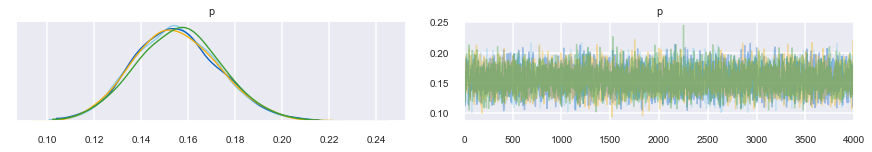

In [5]:
print(pm.summary(trace))
pm.traceplot(trace);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x139293e90>],
      dtype=object)

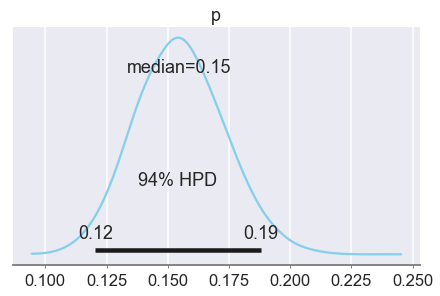

In [6]:
pm.plot_posterior(trace, point_estimate="median")

__Note:__ Feel free to correct my code/math.

Also, feel free to note that we're working with a small sample. I used any country with at least 10+ recoveries.